# Question 1: ANN
- Use MELBOURNE_HOUSE_PRICE dataset (MELBOURNE_HOUSE_PRICES_LESS.csv) to precdict house prices from other features.
- Read more: https://www.kaggle.com/anthonypino/melbourne-housing-market/data
### Requirement:
- Apply ANN to build a model that predicts house prices from the provided features.
- Make new predictions for samples that have no prices in the dataset.

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
print(tf.__version__)
print(keras.__version__)

In [ ]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import sklearn 
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


## Đọc dữ liệu, Tiền xử lý dữ liệu

In [ ]:
data = pd.read_csv("/content/gdrive/My Drive/LDS8_K270_ONLINE_VuThiHa/LDS8_K270_VuThiHa_Cuoi_ky/MELBOURNE_HOUSE_PRICES_LESS.csv")

In [ ]:
print(data.shape)

(63023, 13)


In [ ]:
data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Postcode,Regionname,Propertycount,Distance,CouncilArea
0,Abbotsford,49 Lithgow St,3,h,1490000.0,S,Jellis,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
1,Abbotsford,59A Turner St,3,h,1220000.0,S,Marshall,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
2,Abbotsford,119B Yarra St,3,h,1420000.0,S,Nelson,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
3,Aberfeldie,68 Vida St,3,h,1515000.0,S,Barry,1/04/2017,3040,Western Metropolitan,1543,7.5,Moonee Valley City Council
4,Airport West,92 Clydesdale Rd,2,h,670000.0,S,Nelson,1/04/2017,3042,Western Metropolitan,3464,10.4,Moonee Valley City Council


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63023 entries, 0 to 63022
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         63023 non-null  object 
 1   Address        63023 non-null  object 
 2   Rooms          63023 non-null  int64  
 3   Type           63023 non-null  object 
 4   Price          48433 non-null  float64
 5   Method         63023 non-null  object 
 6   SellerG        63023 non-null  object 
 7   Date           63023 non-null  object 
 8   Postcode       63023 non-null  int64  
 9   Regionname     63023 non-null  object 
 10  Propertycount  63023 non-null  int64  
 11  Distance       63023 non-null  float64
 12  CouncilArea    63023 non-null  object 
dtypes: float64(2), int64(3), object(8)
memory usage: 6.3+ MB


### Các cột có objects

In [ ]:
print(data.select_dtypes(['object']).columns)

Index(['Suburb', 'Address', 'Type', 'Method', 'SellerG', 'Date', 'Regionname',
       'CouncilArea'],
      dtype='object')


In [ ]:
obj_cats = ['Suburb', 'Address', 'Type', 'Method', 'SellerG', 'CouncilArea','Regionname']

for colname in obj_cats:
    data[colname] = data[colname].astype('category') 

In [ ]:
data['Date'] = pd.to_datetime(data['Date'])

In [ ]:
num_cats = ['Postcode']  

for colname in num_cats:
    data[colname] = data[colname].astype('category')   
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63023 entries, 0 to 63022
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Suburb         63023 non-null  category      
 1   Address        63023 non-null  category      
 2   Rooms          63023 non-null  int64         
 3   Type           63023 non-null  category      
 4   Price          48433 non-null  float64       
 5   Method         63023 non-null  category      
 6   SellerG        63023 non-null  category      
 7   Date           63023 non-null  datetime64[ns]
 8   Postcode       63023 non-null  category      
 9   Regionname     63023 non-null  category      
 10  Propertycount  63023 non-null  int64         
 11  Distance       63023 non-null  float64       
 12  CouncilArea    63023 non-null  category      
dtypes: category(8), datetime64[ns](1), float64(2), int64(2)
memory usage: 6.2 MB


### Kiểm tra các giá trị null

In [ ]:
data.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price            14590
Method               0
SellerG              0
Date                 0
Postcode             0
Regionname           0
Propertycount        0
Distance             0
CouncilArea          0
dtype: int64

### Loại bỏ các cột không cần thiết

In [ ]:
data = data.drop(columns=['Address','SellerG','Date','Postcode'])

### One hot encoder

In [ ]:
one_hot_encode_cols = data.select_dtypes(['category']).columns
print(one_hot_encode_cols)

Index(['Suburb', 'Type', 'Method', 'Regionname', 'CouncilArea'], dtype='object')


In [ ]:
new_data = pd.get_dummies(data, columns = one_hot_encode_cols, drop_first = True)
new_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Rooms,63023.0,3.110595,0.957551,1.0,3.0,3.0,4.0,31.0
Price,48433.0,997898.241488,593498.919037,85000.0,620000.0,830000.0,1220000.0,11200000.0
Propertycount,63023.0,7617.728131,4424.423167,39.0,4380.0,6795.0,10412.0,21650.0
Distance,63023.0,12.684829,7.592015,0.0,7.0,11.4,16.7,64.1
Suburb_Aberfeldie,63023.0,0.001761,0.041931,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...
CouncilArea_Whitehorse City Council,63023.0,0.028736,0.167064,0.0,0.0,0.0,0.0,1.0
CouncilArea_Whittlesea City Council,63023.0,0.040382,0.196855,0.0,0.0,0.0,0.0,1.0
CouncilArea_Wyndham City Council,63023.0,0.024467,0.154496,0.0,0.0,0.0,0.0,1.0
CouncilArea_Yarra City Council,63023.0,0.026943,0.161917,0.0,0.0,0.0,0.0,1.0


In [ ]:
new_data.head()

,Rooms,Price,Propertycount,Distance,Suburb_Aberfeldie,Suburb_Airport West,Suburb_Albanvale,Suburb_Albert Park,Suburb_Albion,Suburb_Alphington,Suburb_Altona,Suburb_Altona Meadows,Suburb_Altona North,Suburb_Ardeer,Suburb_Armadale,Suburb_Ascot Vale,Suburb_Ashburton,Suburb_Ashwood,Suburb_Aspendale,Suburb_Aspendale Gardens,Suburb_Attwood,Suburb_Avondale Heights,Suburb_Avonsleigh,Suburb_Bacchus Marsh,Suburb_Balaclava,Suburb_Balwyn,Suburb_Balwyn North,Suburb_Bayswater,Suburb_Bayswater North,Suburb_Beaconsfield,Suburb_Beaconsfield Upper,Suburb_Beaumaris,Suburb_Belgrave,Suburb_Belgrave Heights,Suburb_Belgrave South,Suburb_Bellfield,Suburb_Bentleigh,Suburb_Bentleigh East,Suburb_Berwick,Suburb_Black Rock,...,Regionname_Eastern Victoria,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan,Regionname_Western Victoria,CouncilArea_Bayside City Council,CouncilArea_Boroondara City Council,CouncilArea_Brimbank City Council,CouncilArea_Cardinia Shire Council,CouncilArea_Casey City Council,CouncilArea_Darebin City Council,CouncilArea_Frankston City Council,CouncilArea_Glen Eira City Council,CouncilArea_Greater Dandenong City Council,CouncilArea_Hobsons Bay City Council,CouncilArea_Hume City Council,CouncilArea_Kingston City Council,CouncilArea_Knox City Council,CouncilArea_Macedon Ranges Shire Council,CouncilArea_Manningham City Council,CouncilArea_Maribyrnong City Council,CouncilArea_Maroondah City Council,CouncilArea_Melbourne City Council,CouncilArea_Melton City Council,CouncilArea_Mitchell Shire Council,CouncilArea_Monash City Council,CouncilArea_Moonee Valley City Council,CouncilArea_Moorabool Shire Council,CouncilArea_Moreland City Council,CouncilArea_Murrindindi Shire Council,CouncilArea_Nillumbik Shire Council,CouncilArea_Port Phillip City Council,CouncilArea_Stonnington City Council,CouncilArea_Whitehorse City Council,CouncilArea_Whittlesea City Council,CouncilArea_Wyndham City Council,CouncilArea_Yarra City Council,CouncilArea_Yarra Ranges Shire Council
0,3,1490000.0,4019,3.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,3,1220000.0,4019,3.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,3,1420000.0,4019,3.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,3,1515000.0,1543,7.5,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,2,670000.0,3464,10.4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


### Loại bỏ các dòng null

In [ ]:
dataset =new_data[pd.notnull(new_data['Price'])]

In [ ]:
dataset.head()

,Rooms,Price,Propertycount,Distance,Suburb_Aberfeldie,Suburb_Airport West,Suburb_Albanvale,Suburb_Albert Park,Suburb_Albion,Suburb_Alphington,Suburb_Altona,Suburb_Altona Meadows,Suburb_Altona North,Suburb_Ardeer,Suburb_Armadale,Suburb_Ascot Vale,Suburb_Ashburton,Suburb_Ashwood,Suburb_Aspendale,Suburb_Aspendale Gardens,Suburb_Attwood,Suburb_Avondale Heights,Suburb_Avonsleigh,Suburb_Bacchus Marsh,Suburb_Balaclava,Suburb_Balwyn,Suburb_Balwyn North,Suburb_Bayswater,Suburb_Bayswater North,Suburb_Beaconsfield,Suburb_Beaconsfield Upper,Suburb_Beaumaris,Suburb_Belgrave,Suburb_Belgrave Heights,Suburb_Belgrave South,Suburb_Bellfield,Suburb_Bentleigh,Suburb_Bentleigh East,Suburb_Berwick,Suburb_Black Rock,...,Regionname_Eastern Victoria,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan,Regionname_Western Victoria,CouncilArea_Bayside City Council,CouncilArea_Boroondara City Council,CouncilArea_Brimbank City Council,CouncilArea_Cardinia Shire Council,CouncilArea_Casey City Council,CouncilArea_Darebin City Council,CouncilArea_Frankston City Council,CouncilArea_Glen Eira City Council,CouncilArea_Greater Dandenong City Council,CouncilArea_Hobsons Bay City Council,CouncilArea_Hume City Council,CouncilArea_Kingston City Council,CouncilArea_Knox City Council,CouncilArea_Macedon Ranges Shire Council,CouncilArea_Manningham City Council,CouncilArea_Maribyrnong City Council,CouncilArea_Maroondah City Council,CouncilArea_Melbourne City Council,CouncilArea_Melton City Council,CouncilArea_Mitchell Shire Council,CouncilArea_Monash City Council,CouncilArea_Moonee Valley City Council,CouncilArea_Moorabool Shire Council,CouncilArea_Moreland City Council,CouncilArea_Murrindindi Shire Council,CouncilArea_Nillumbik Shire Council,CouncilArea_Port Phillip City Council,CouncilArea_Stonnington City Council,CouncilArea_Whitehorse City Council,CouncilArea_Whittlesea City Council,CouncilArea_Wyndham City Council,CouncilArea_Yarra City Council,CouncilArea_Yarra Ranges Shire Council
0,3,1490000.0,4019,3.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,3,1220000.0,4019,3.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,3,1420000.0,4019,3.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,3,1515000.0,1543,7.5,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,2,670000.0,3464,10.4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
test = new_data[(new_data['Price'].isnull())]

In [ ]:
test = test.drop(columns='Price')

In [ ]:
test.shape

(14590, 432)

## Xây dựng model ANN

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

from tensorflow.keras import layers


In [ ]:
df_train = dataset.sample(frac=0.7, random_state=0)
df_valid = dataset.drop(df_train.index)
display(df_train.head(4))

,Rooms,Price,Propertycount,Distance,Suburb_Aberfeldie,Suburb_Airport West,Suburb_Albanvale,Suburb_Albert Park,Suburb_Albion,Suburb_Alphington,Suburb_Altona,Suburb_Altona Meadows,Suburb_Altona North,Suburb_Ardeer,Suburb_Armadale,Suburb_Ascot Vale,Suburb_Ashburton,Suburb_Ashwood,Suburb_Aspendale,Suburb_Aspendale Gardens,Suburb_Attwood,Suburb_Avondale Heights,Suburb_Avonsleigh,Suburb_Bacchus Marsh,Suburb_Balaclava,Suburb_Balwyn,Suburb_Balwyn North,Suburb_Bayswater,Suburb_Bayswater North,Suburb_Beaconsfield,Suburb_Beaconsfield Upper,Suburb_Beaumaris,Suburb_Belgrave,Suburb_Belgrave Heights,Suburb_Belgrave South,Suburb_Bellfield,Suburb_Bentleigh,Suburb_Bentleigh East,Suburb_Berwick,Suburb_Black Rock,...,Regionname_Eastern Victoria,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan,Regionname_Western Victoria,CouncilArea_Bayside City Council,CouncilArea_Boroondara City Council,CouncilArea_Brimbank City Council,CouncilArea_Cardinia Shire Council,CouncilArea_Casey City Council,CouncilArea_Darebin City Council,CouncilArea_Frankston City Council,CouncilArea_Glen Eira City Council,CouncilArea_Greater Dandenong City Council,CouncilArea_Hobsons Bay City Council,CouncilArea_Hume City Council,CouncilArea_Kingston City Council,CouncilArea_Knox City Council,CouncilArea_Macedon Ranges Shire Council,CouncilArea_Manningham City Council,CouncilArea_Maribyrnong City Council,CouncilArea_Maroondah City Council,CouncilArea_Melbourne City Council,CouncilArea_Melton City Council,CouncilArea_Mitchell Shire Council,CouncilArea_Monash City Council,CouncilArea_Moonee Valley City Council,CouncilArea_Moorabool Shire Council,CouncilArea_Moreland City Council,CouncilArea_Murrindindi Shire Council,CouncilArea_Nillumbik Shire Council,CouncilArea_Port Phillip City Council,CouncilArea_Stonnington City Council,CouncilArea_Whitehorse City Council,CouncilArea_Whittlesea City Council,CouncilArea_Wyndham City Council,CouncilArea_Yarra City Council,CouncilArea_Yarra Ranges Shire Council
30430,2,688000.0,3755,10.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
35555,3,455000.0,1281,12.8,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
49947,3,723000.0,2651,11.2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
35008,3,880000.0,10788,24.8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
X_train = df_train.drop('Price', axis=1)
X_valid = df_valid.drop('Price', axis=1)
y_train = df_train['Price']
y_valid = df_valid['Price']

In [ ]:
X_train = dataset.drop(columns=['Price'])
X_train.head()

,Rooms,Propertycount,Distance,Suburb_Aberfeldie,Suburb_Airport West,Suburb_Albanvale,Suburb_Albert Park,Suburb_Albion,Suburb_Alphington,Suburb_Altona,Suburb_Altona Meadows,Suburb_Altona North,Suburb_Ardeer,Suburb_Armadale,Suburb_Ascot Vale,Suburb_Ashburton,Suburb_Ashwood,Suburb_Aspendale,Suburb_Aspendale Gardens,Suburb_Attwood,Suburb_Avondale Heights,Suburb_Avonsleigh,Suburb_Bacchus Marsh,Suburb_Balaclava,Suburb_Balwyn,Suburb_Balwyn North,Suburb_Bayswater,Suburb_Bayswater North,Suburb_Beaconsfield,Suburb_Beaconsfield Upper,Suburb_Beaumaris,Suburb_Belgrave,Suburb_Belgrave Heights,Suburb_Belgrave South,Suburb_Bellfield,Suburb_Bentleigh,Suburb_Bentleigh East,Suburb_Berwick,Suburb_Black Rock,Suburb_Blackburn,...,Regionname_Eastern Victoria,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan,Regionname_Western Victoria,CouncilArea_Bayside City Council,CouncilArea_Boroondara City Council,CouncilArea_Brimbank City Council,CouncilArea_Cardinia Shire Council,CouncilArea_Casey City Council,CouncilArea_Darebin City Council,CouncilArea_Frankston City Council,CouncilArea_Glen Eira City Council,CouncilArea_Greater Dandenong City Council,CouncilArea_Hobsons Bay City Council,CouncilArea_Hume City Council,CouncilArea_Kingston City Council,CouncilArea_Knox City Council,CouncilArea_Macedon Ranges Shire Council,CouncilArea_Manningham City Council,CouncilArea_Maribyrnong City Council,CouncilArea_Maroondah City Council,CouncilArea_Melbourne City Council,CouncilArea_Melton City Council,CouncilArea_Mitchell Shire Council,CouncilArea_Monash City Council,CouncilArea_Moonee Valley City Council,CouncilArea_Moorabool Shire Council,CouncilArea_Moreland City Council,CouncilArea_Murrindindi Shire Council,CouncilArea_Nillumbik Shire Council,CouncilArea_Port Phillip City Council,CouncilArea_Stonnington City Council,CouncilArea_Whitehorse City Council,CouncilArea_Whittlesea City Council,CouncilArea_Wyndham City Council,CouncilArea_Yarra City Council,CouncilArea_Yarra Ranges Shire Council
0,3,4019,3.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,3,4019,3.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,3,4019,3.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,3,1543,7.5,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,2,3464,10.4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
y_train = dataset['Price']

In [ ]:
model = Sequential()
model.add(Dense(216, activation='relu', input_shape=(432,)))
model.add(Dense(108, activation='relu'))
model.add(Dense(54, activation='relu'))
model.add(Dense(26, activation='relu'))
model.add(Dense(14, activation='relu'))
model.add(Dense(8, activation='relu')) # cải tiến bằng cách thử cho học sâu hơn,
model.add(Dense(1))

In [ ]:
model.compile(optimizer='adam',
              loss='mae',
              metrics=['mse','mae'])

### Fit model

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(patience=10)

history = model.fit(X_train, y_train, epochs=200,batch_size=32,verbose=1,validation_split=0.3, callbacks=[early_stopping])

Epoch 1/200
1060/1060 [==============================] - 4s 3ms/step - loss: 606221.3750 - mse: 671483691008.0000 - mae: 606221.3750 - val_loss: 584218.6250 - val_mse: 647279214592.0000 - val_mae: 584218.6250
Epoch 2/200
1060/1060 [==============================] - 3s 3ms/step - loss: 574643.5000 - mse: 620866306048.0000 - mae: 574643.5000 - val_loss: 561697.4375 - val_mse: 623360540672.0000 - val_mae: 561697.4375
Epoch 3/200
1060/1060 [==============================] - 3s 3ms/step - loss: 491332.2500 - mse: 509371088896.0000 - mae: 491332.2500 - val_loss: 459723.2812 - val_mse: 497237688320.0000 - val_mae: 459723.2812
Epoch 4/200
1060/1060 [==============================] - 3s 3ms/step - loss: 420141.3125 - mse: 406421372928.0000 - mae: 420141.3125 - val_loss: 399195.7812 - val_mse: 419719413760.0000 - val_mae: 399195.7812
Epoch 5/200
1060/1060 [==============================] - 3s 3ms/step - loss: 325588.5000 - mse: 274513461248.0000 - mae: 325588.5000 - val_loss: 350489.5625 - val_m

### Đánh giá model

In [ ]:
scores = model.evaluate(X_train, y_train)
print(scores)

1514/1514 [==============================] - 2s 1ms/step - loss: 184850.6719 - mse: 110552875008.0000 - mae: 184850.6719
[184850.671875, 110552875008.0, 184850.671875]


Minimum validation loss: 187883.015625


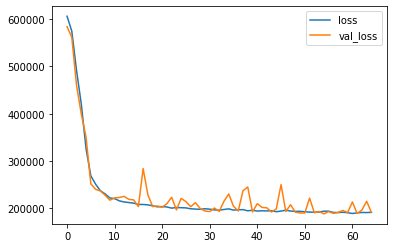

In [ ]:
history_df = pd.DataFrame(history.history)
history_df.loc[:,['loss','val_loss']].plot()
print("Minimum validation loss: {}".format(history_df['val_loss'].min()))

### Dự đoán kết quả

In [ ]:
y_valid_hat = model.predict(X_valid)

In [ ]:
y_valid_hat[:5]

array([[1321329.1],
       [ 579691.4],
       [ 847497. ],
       [1072668.8],
       [ 731820. ]], dtype=float32)

In [ ]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_valid,y_valid_hat)

184895.36469158638

### Lưu model

In [ ]:
model.save('ANN_house_price.h5')

In [ ]:
from tensorflow.keras.models import load_model
model_load = load_model('ANN_house_price.h5')

In [ ]:
price_predict = model_load.predict(test)

In [ ]:
price_predict[:5]

array([[ 902876.9],
       [ 749477.4],
       [1953552.8],
       [ 671327.7],
       [1533167.8]], dtype=float32)

In [ ]:
y_valid_hat[:5]

array([[1321329.1],
       [ 579691.4],
       [ 847497. ],
       [1072668.8],
       [ 731820. ]], dtype=float32)

## Tối ưu model, chọn tham số tốt nhất, dùng GridSearchCV

In [ ]:
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import GridSearchCV

In [ ]:
def build_regressor(optimizer):
  model = keras.Sequential([layers.Dense(6, activation='relu',input_shape=[432]),
                          layers.Dense(6,activation='relu'),
                          layers.Dense(1)])
  model.compile(optimizer='adam',
                loss='mae',
                metrics=['mse','mae'])
  return model

In [ ]:
regressor = KerasRegressor(build_fn= build_regressor)

In [ ]:
parameters = {
    'batch_size': [32,64,128],
    'epochs': [100,150,200],
    'optimizer': ['adam','rmsprop','sgd']}

grid_search = GridSearchCV(estimator=regressor,
                           param_grid=parameters,
                           cv =5)

In [45]:
grid_search = grid_search.fit(X_train,y_train)

Streaming output truncated to the last 5000 lines.
1211/1211 [==============================] - 2s 2ms/step - loss: 580317.7500 - mse: 634903855104.0000 - mae: 580317.7500
Epoch 26/200
1211/1211 [==============================] - 2s 2ms/step - loss: 579982.9375 - mse: 634262585344.0000 - mae: 579982.9375
Epoch 27/200
1211/1211 [==============================] - 2s 2ms/step - loss: 579595.9375 - mse: 633785221120.0000 - mae: 579595.9375
Epoch 28/200
1211/1211 [==============================] - 2s 2ms/step - loss: 579247.8125 - mse: 633228951552.0000 - mae: 579247.8125
Epoch 29/200
1211/1211 [==============================] - 2s 2ms/step - loss: 578849.7500 - mse: 632871583744.0000 - mae: 578849.7500
Epoch 30/200
1211/1211 [==============================] - 2s 2ms/step - loss: 578449.1250 - mse: 632184242176.0000 - mae: 578449.1250
Epoch 31/200
1211/1211 [==============================] - 2s 2ms/step - loss: 578039.7500 - mse: 631646191616.0000 - mae: 578039.7500
Epoch 32/200
1211/1211 [

KeyboardInterrupt: ignored

In [ ]:
best_parameters = grid_search.best_params_
best_score = grid_search.best_score_
print("best_parameters:", best_parameters)
print("best_score:", best_score)


best_parameters: {'batch_size': 32, 'epochs': 200, 'optimizer': 'rmsprop'}
best_score: -239387.371875


In [ ]:
  model_grid_search = keras.Sequential([layers.Dense(6, activation='relu',input_shape=[432]),
                          layers.Dense(6,activation='relu'),
                          layers.Dense(1)])
  model_grid_search.compile(optimizer='rmsprop',
                loss='mae',
                metrics=['mse','mae'])

In [ ]:
history_grid_search = model_grid_search.fit(X_train,y_train,
                    validation_data=(X_valid,y_valid),
                    batch_size = 32, # default = 32
                    epochs=200,
                    callbacks=[early_stopping])

Epoch 1/200
1514/1514 [==============================] - 3s 2ms/step - loss: 879834.6250 - mse: 1144465915904.0000 - mae: 879834.6250 - val_loss: 638363.0000 - val_mse: 748581289984.0000 - val_mae: 638363.0000
Epoch 2/200
1514/1514 [==============================] - 3s 2ms/step - loss: 589273.3125 - mse: 649989259264.0000 - mae: 589273.3125 - val_loss: 586418.2500 - val_mse: 644625465344.0000 - val_mae: 586418.2500
Epoch 3/200
 104/1514 [=>............................] - ETA: 2s - loss: 584140.0625 - mse: 638920491008.0000 - mae: 584140.0625

KeyboardInterrupt: ignored

In [ ]:
history_grid_search_df = pd.DataFrame(history_grid_search.history)
history_grid_search_df.loc[:,['loss','val_loss']].plot()
print("Minimum validation loss: {}".format(history_grid_search_df['val_loss'].min()))

NameError: ignored

# New Section